In [1]:
import mxnet as mx
import numpy as np

In [72]:
# input data
n = 1000
x = np.linspace(-1.0,1.0, num=n)
y = pow(x, 2)+0.2 * np.random.rand(n)
#x = x.reshape((n, 1))
train_iter = mx.io.NDArrayIter(x, y, n, shuffle=True,label_name='lin_reg_label')

In [73]:
# Create the model
X = mx.sym.Variable('data')
net  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden=100)
net = mx.sym.Activation(data=net, act_type="relu")
net  = mx.sym.FullyConnected(data=net, num_hidden = 1)

In [74]:
# define loss and optimizer
Y = mx.symbol.Variable('lin_reg_label')
loss = mx.sym.LinearRegressionOutput(data=net, label=Y, name="lro")
adam = mx.optimizer.create('adam', learning_rate=0.0001)

In [75]:
# create a trainable module 
model = mx.mod.Module(symbol=loss, data_names=['data'], label_names=['lin_reg_label'])

In [76]:
# Train
model.fit(train_iter, None, 
          optimizer=adam,
          num_epoch=100)


In [77]:
y_pred = model.predict(train_iter).asnumpy()

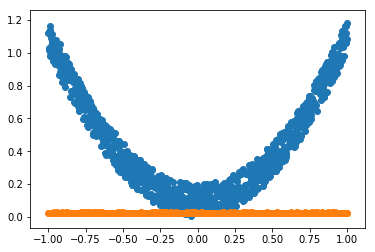

In [78]:
# Visualize prediction
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.scatter(x, y_pred)
plt.show()